In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from src.augment import ImageBatchProcessor
from src.crop import crop_images_from_folder
from src.model import model
from src.dataset import dataset
seed = 42
image_folder = 'dataset/train/images/'
label_folder = 'dataset/train/labels/'
target_image_folder = 'dataset/train/images_aug/'
target_label_folder = 'dataset/train/labels_aug/'

In [ ]:
processor = ImageBatchProcessor(image_folder=image_folder, label_folder=label_folder, target_image_folder=target_image_folder, target_label_folder=target_label_folder)
processor.augment_and_save(nb_augmentation=5)


In [ ]:
#crop_images_from_folder(target_image_folder, target_label_folder, 'dataset/train/aug_cropped_images/')
crop_images_from_folder(image_folder, label_folder, 'dataset/train/cropped_images/')
val_path = 'dataset/val/images/'
val_label_path = 'dataset/val/labels/'
crop_images_from_folder(val_path, val_label_path, 'dataset/val/cropped_images/')

In [8]:
val_path = 'dataset/val/cropped_images/'
aug_train_path = 'dataset/train/aug_cropped_images/'
train_path = 'dataset/train/cropped_images/'
standard_size = (64, 64)
label_size_factor = 1

train_data = dataset(img_dir=train_path, augment_path=aug_train_path, label_size_factor=label_size_factor, standard_size=standard_size)
val_data = dataset(val_path, train=False, standard_size=standard_size)


Found 2390 images in dataset/train/aug_cropped_images/
Label ceder has 245 images
Label None has 0 images
Label interdiction has 1025 images
Label frouge has 225 images
Label none has 0 images
Label fvert has 295 images
Label obligation has 95 images
Label danger has 295 images
Label forange has 145 images
Label stop has 65 images
Augmenting label ceder with 243 images, using 245 images
No augmented images found for label None
Augmenting label interdiction with 11 images, using 1025 images
Augmenting label frouge with 286 images, using 225 images
Skipping label none as it already has enough images
Augmenting label fvert with 267 images, using 295 images
Augmenting label obligation with 268 images, using 95 images
Augmenting label danger with 214 images, using 295 images
Augmenting label forange with 309 images, using 145 images
Augmenting label stop with 276 images, using 65 images


Preprocessing images: 100%|██████████| 3708/3708 [00:00<00:00, 2281425.73it/s]

Total loading time: 9.51 seconds



Preprocessing images: 100%|██████████| 169/169 [00:00<00:00, 1603704.47it/s]

Total loading time: 0.53 seconds


In [9]:
label_count = {}
for x in train_data.images:
    label = x.label
    if label in label_count.keys():
        label_count[label] +=1
    else:
        label_count[label] =1
label_count

{'ceder': 376,
 None: 324,
 'interdiction': 376,
 'frouge': 376,
 'none': 376,
 'fvert': 376,
 'obligation': 376,
 'danger': 376,
 'forange': 376,
 'stop': 376}

In [10]:
max_iter = 10000
# initialize the model
my_model = model(seed)
#my_model.train_lr(train_data, verbose=1, max_iter=max_iter)
#my_model.grid_search_svm(train_data, verbose=2, max_iter=max_iter)
my_model.train_svm(train_data, verbose=0, max_iter=max_iter)
#my_model.train_OneVsRest(train_data, verbose=1, max_iter=max_iter)
#my_model.plot_learning_curve(train_data, verbose=1)
print(f"Model trained with {my_model.name} with seed {seed},max_iter {max_iter}, standard_size {standard_size}, label_size_factor {label_size_factor}")

Number of nan values in X: 0


/home/alexandre/.conda/envs/sy32/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy on test data: 0.9339622641509434
              precision    recall  f1-score   support

       ceder       1.00      1.00      1.00        66
      danger       0.88      0.97      0.93        70
     forange       0.96      0.96      0.96        77
      frouge       0.88      0.96      0.92        75
       fvert       0.95      0.90      0.92        78
interdiction       0.87      0.98      0.92        91
        none       0.93      0.81      0.87       145
  obligation       1.00      0.97      0.98        64
        stop       0.99      0.97      0.98        76

    accuracy                           0.93       742
   macro avg       0.94      0.95      0.94       742
weighted avg       0.94      0.93      0.93       742

Model trained with SVM with seed 42,max_iter 10000, standard_size (64, 64), label_size_factor 1


Accuracy on validation data: 0.8994082840236687
              precision    recall  f1-score   support

       ceder       1.00      0.94      0.97        16
      danger       0.90      1.00      0.95        19
     forange       1.00      0.83      0.91         6
      frouge       0.85      0.85      0.85        13
       fvert       0.40      1.00      0.57         2
interdiction       0.91      0.89      0.90        44
        none       0.87      0.85      0.86        39
  obligation       1.00      0.88      0.93        16
        stop       0.93      1.00      0.97        14

    accuracy                           0.90       169
   macro avg       0.87      0.91      0.88       169
weighted avg       0.91      0.90      0.90       169



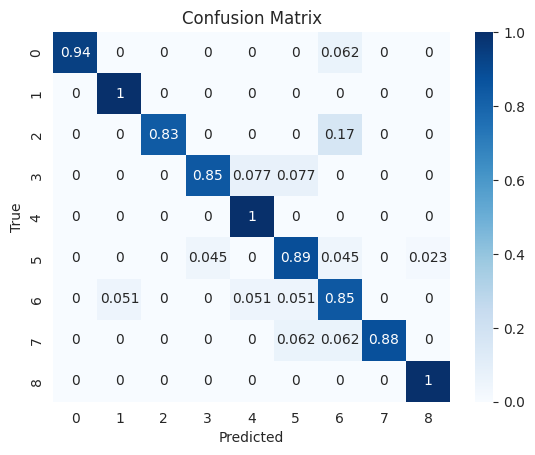

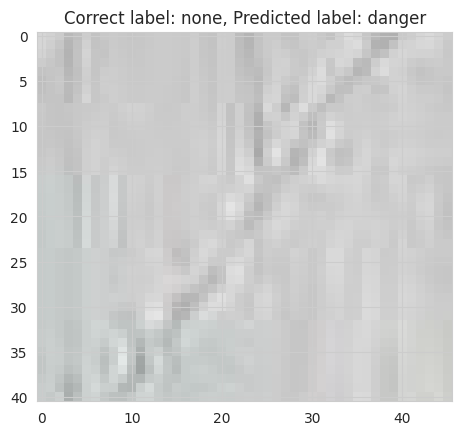

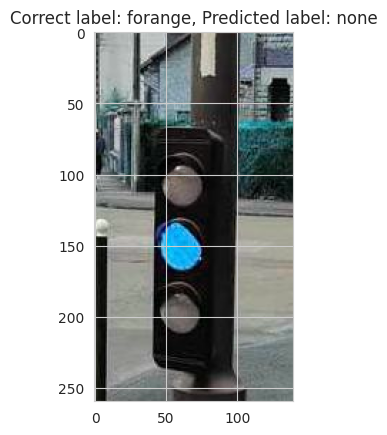

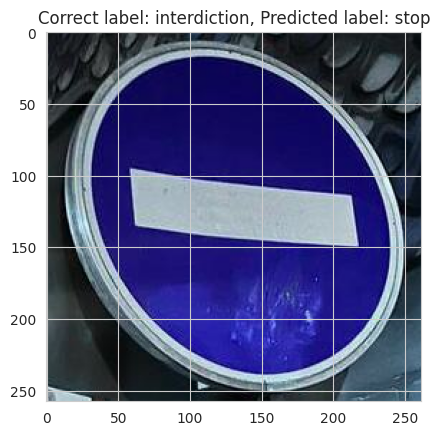

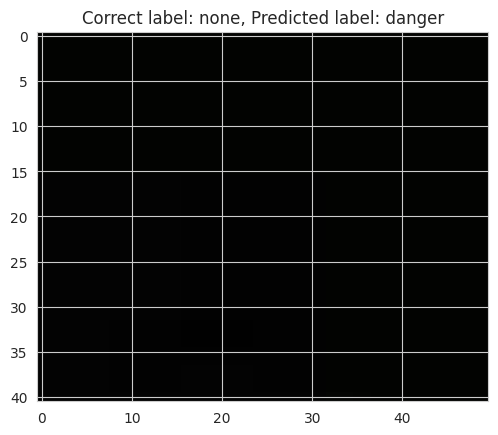

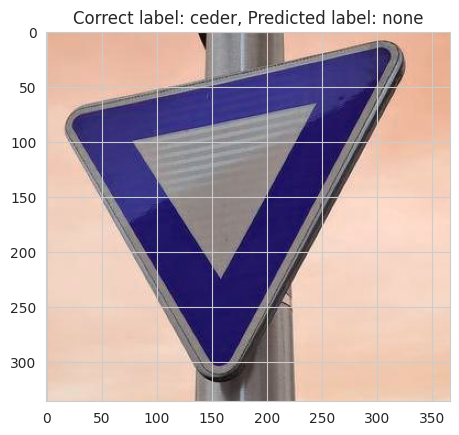

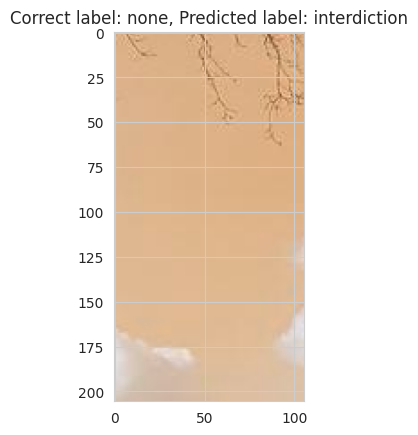

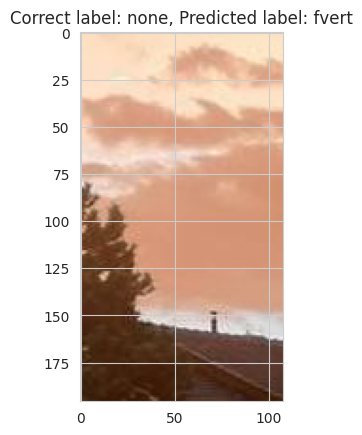

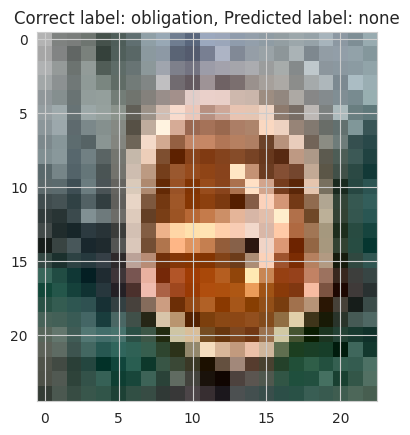

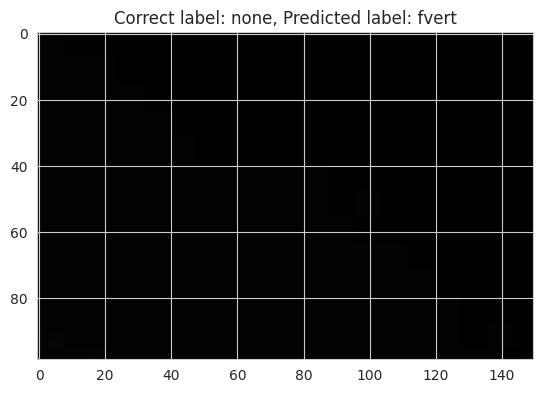

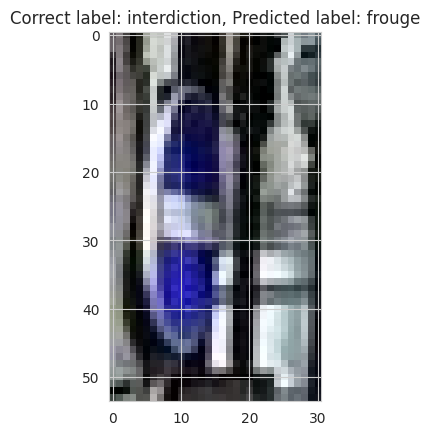

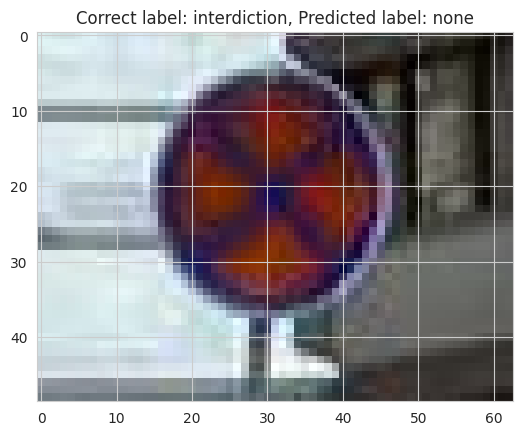

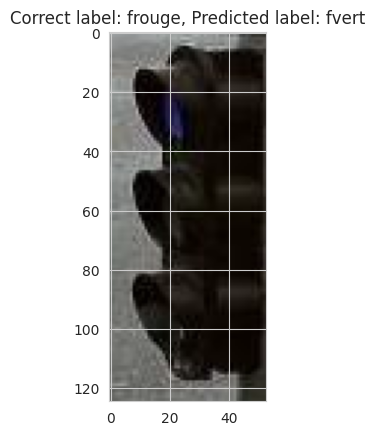

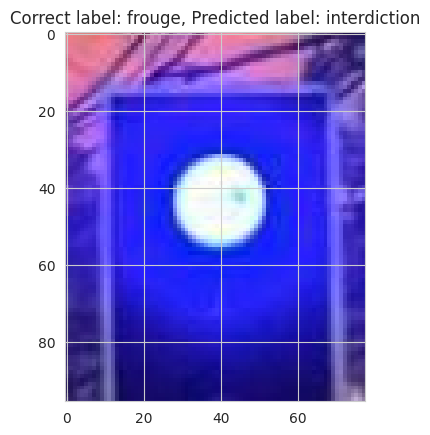

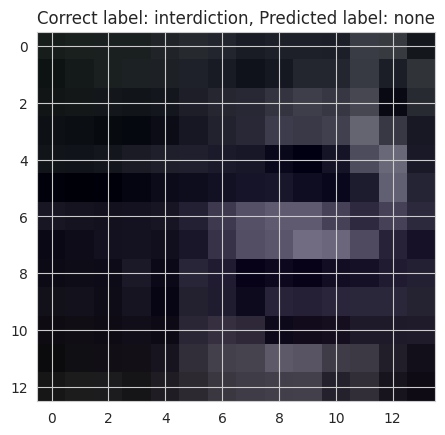

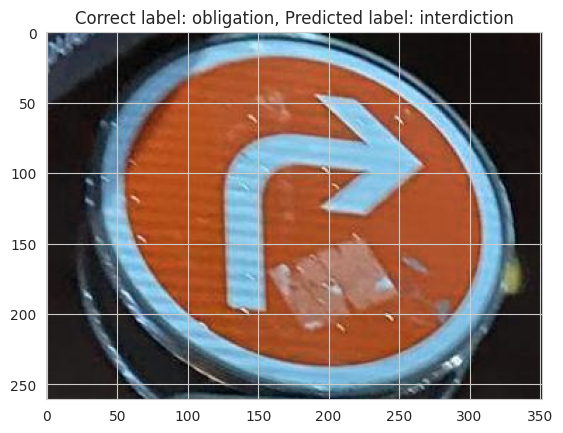

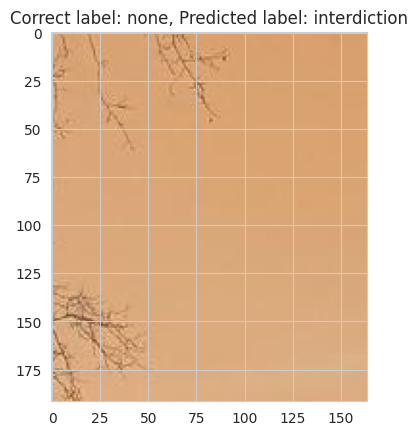

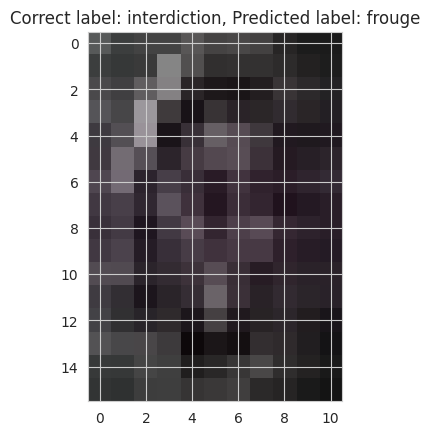

Model accuracy with SVM: 0.8994082840236687


In [11]:
accuracy = my_model.evaluate(val_data)
print("Model accuracy with SVM: {}  ".format(accuracy))

In [12]:
my_model.save("src/models", name="hog_third_augmented")
